In [135]:
## importing the necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, cohen_kappa_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
import joblib
import warnings  # Warnings module is used to manage warnings in the code
warnings.filterwarnings("ignore")  # This line suppresses warnings to avoid clutter in the output

In [136]:
df = pd.read_csv('/content/mental_health_survey_dataset.csv')
df

,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Terry Alvarado,Male,32,Delhi,Working Professional,Developer,9,4,8.83,2,9,8.4,Healthy,Masters,No,10,6,No,Yes
1,Scott Moreno,Male,35,Mumbai,Student,Researcher,7,9,4.45,3,8,4.9,Unhealthy,PhD,No,11,9,No,Yes
2,Kelli Blevins,Male,35,Singapore,Working Professional,Engineer,4,6,4.86,3,10,3.9,Unhealthy,Masters,No,10,1,No,No
3,Gary Walters,Male,37,Sydney,Working Professional,Teacher,2,4,8.77,6,6,4.3,Unhealthy,PhD,No,1,6,No,No
4,Anthony Salazar,Male,26,Mumbai,Working Professional,Student,5,1,4.28,3,3,7.5,Healthy,Diploma,No,1,3,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Brian Paul,Male,34,Mumbai,Working Professional,Artist,2,3,4.55,9,8,6.9,Moderate,Masters,No,5,6,No,Yes
9996,Tara Lewis,Male,25,Tokyo,Working Professional,Engineer,6,2,7.46,2,10,5.9,Unhealthy,PhD,No,8,8,No,No
9997,Jordan Atkins,Female,25,London,Student,Student,9,10,8.23,3,10,4.5,Unhealthy,Masters,No,12,9,No,No
9998,Sherri Hughes,Female,36,Singapore,Working Professional,Student,10,4,4.45,8,5,4.4,Moderate,Masters,No,13,6,No,No


In [137]:
# BASIC DATA ANALYSIS
# ----------------------
# Check shape (rows, columns)
print(f"Dataset shape: {df.shape}")
# View column data types
print(df.dtypes)
# Summary statistics for numerical columns
print(df.describe())


Dataset shape: (10000, 19)
Name                                      object
Gender                                    object
Age                                        int64
City                                      object
Working Professional or Student           object
Profession                                object
Academic Pressure                          int64
Work Pressure                              int64
CGPA                                     float64
Study Satisfaction                         int64
Job Satisfaction                           int64
Sleep Duration                           float64
Dietary Habits                            object
Degree                                    object
Have you ever had suicidal thoughts ?     object
Work/Study Hours                           int64
Financial Stress                           int64
Family History of Mental Illness          object
Depression                                object
dtype: object
                Age  Academi

In [138]:
# Check for missing values
print(df.isnull().sum())
# Count of unique values per categorical column
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"\nValue counts for {col}:\n{df[col].value_counts()}")
# Check how many are labeled as having depression
print("\nDepression count:\n", df['Depression'].value_counts())


Name                                     0
Gender                                   0
Age                                      0
City                                     0
Working Professional or Student          0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

Value counts for Name:
Name
Christopher Jones    7
David Johnson        5
Jeffrey Moore        5
Justin Johnson       5
Kelly Jones          5
                    ..
Dan

In [139]:
# Set visual style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (8,4)

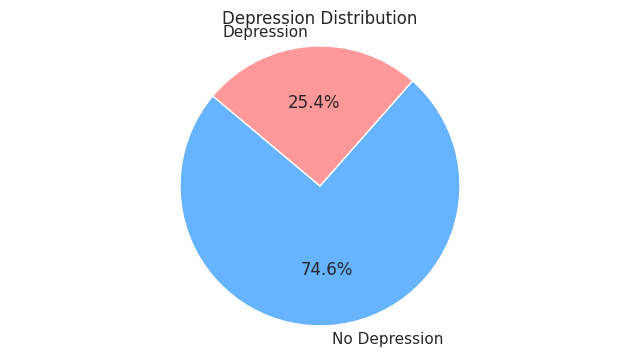

In [140]:
# 1. Pie Chart – Depression Distribution
# ------------------------
depression_counts = df['Depression'].value_counts()
labels = ['No Depression', 'Depression']
colors = ['#66b3ff', '#ff9999']
plt.pie(depression_counts, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title("Depression Distribution")
plt.axis('equal')
plt.show()

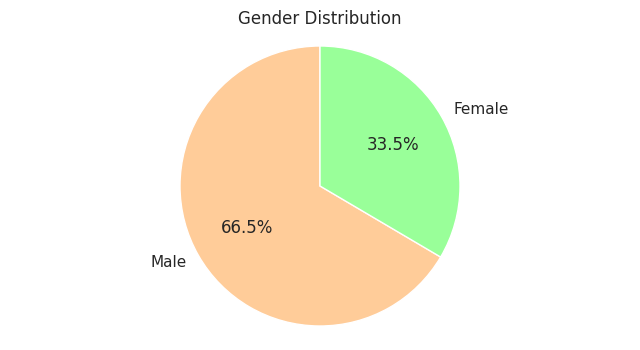

In [141]:
# 2. Pie Chart – Gender Distribution
# ------------------------
gender_counts = df['Gender'].value_counts()
labels = ['Male', 'Female']
plt.pie(gender_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#ffcc99','#99ff99','#66b3ff'])
plt.title("Gender Distribution")
plt.axis('equal')
plt.show()

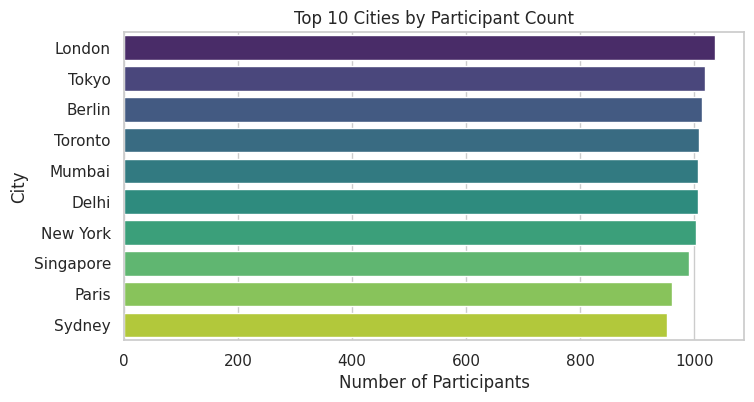

In [142]:
# 3. Bar plot: Count by City
city_counts = df['City'].value_counts().head(10)  # top 10 cities
sns.barplot(x=city_counts.values, y=city_counts.index, palette='viridis')
plt.title('Top 10 Cities by Participant Count')
plt.xlabel('Number of Participants')
plt.ylabel('City')
plt.show()

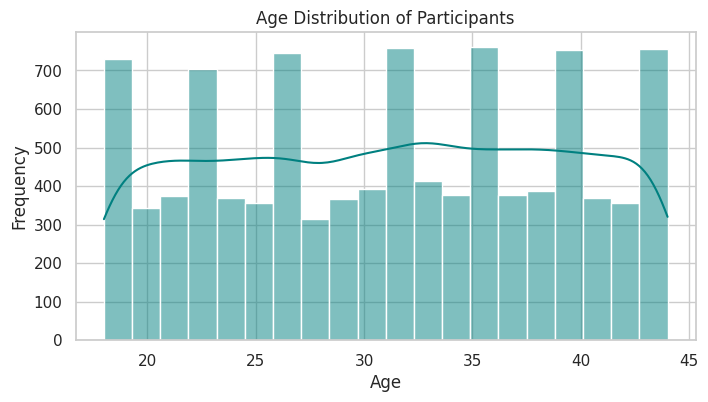

In [143]:
# 4. Histogram: Age distribution
sns.histplot(df['Age'], bins=20, kde=True, color='teal')
plt.title('Age Distribution of Participants')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

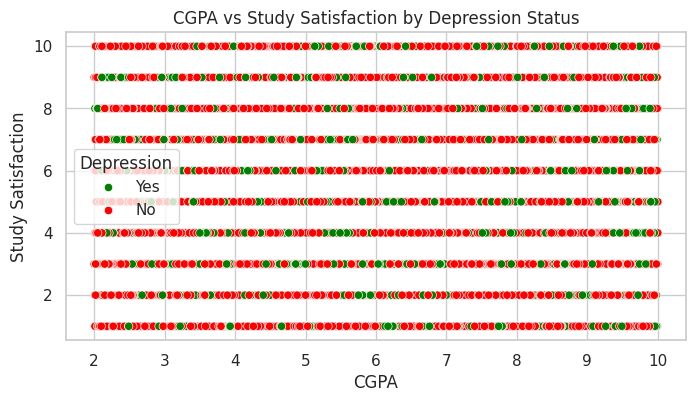

In [144]:
# 5. Scatter plot: CGPA vs Study Satisfaction (colored by Depression)
sns.scatterplot(x='CGPA', y='Study Satisfaction', hue='Depression', data=df, palette=['green','red'])
plt.title('CGPA vs Study Satisfaction by Depression Status')
plt.show()

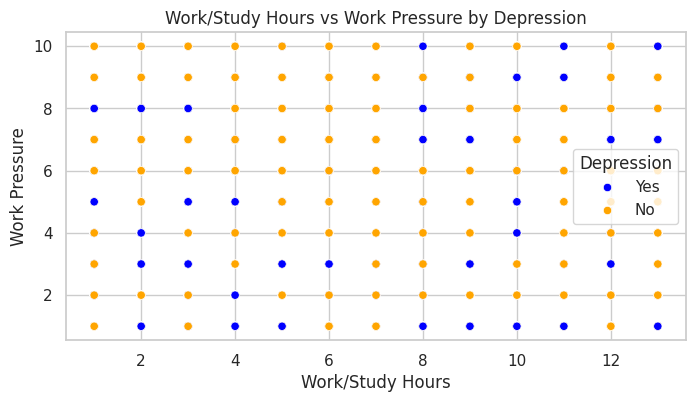

In [145]:
# 6. Scatter plot: Work/Study Hours vs Work Pressure (colored by Depression)
sns.scatterplot(x='Work/Study Hours', y='Work Pressure', hue='Depression', data=df, palette=['blue','orange'])
plt.title('Work/Study Hours vs Work Pressure by Depression')
plt.show()

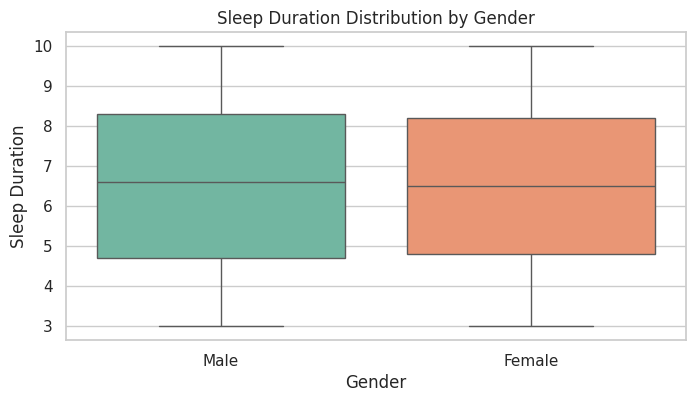

In [146]:
# 7. Box plot: Sleep Duration by Gender
sns.boxplot(x='Gender', y='Sleep Duration', data=df, palette='Set2')
plt.title('Sleep Duration Distribution by Gender')
plt.show()

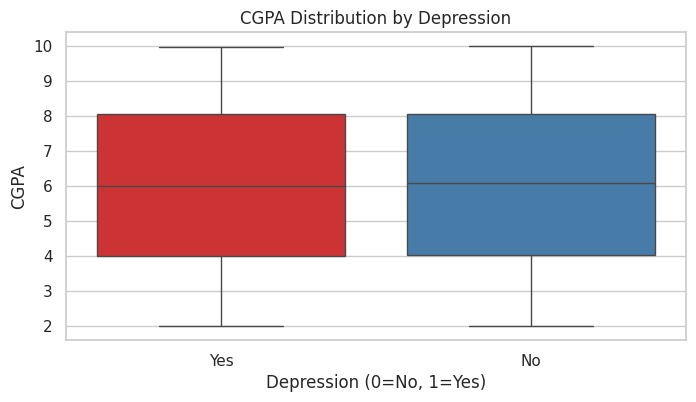

In [147]:
# 8. Box plot: CGPA by Depression status
sns.boxplot(x='Depression', y='CGPA', data=df, palette='Set1')
plt.title('CGPA Distribution by Depression')
plt.xlabel('Depression (0=No, 1=Yes)')
plt.show()

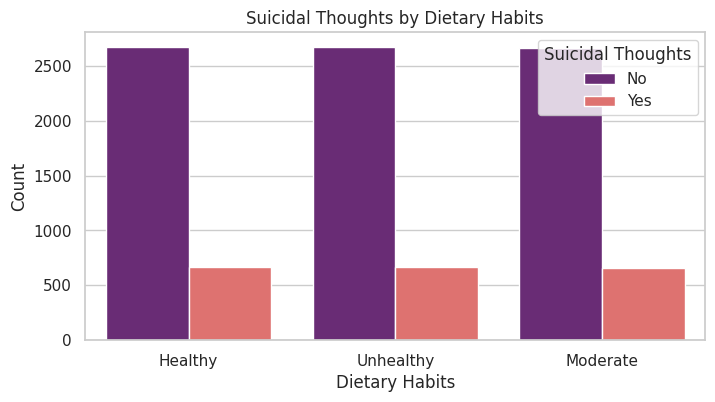

In [148]:
# 9. Count plot: Suicidal Thoughts by Dietary Habits
sns.countplot(x='Dietary Habits', hue='Have you ever had suicidal thoughts ?', data=df, palette='magma')
plt.title('Suicidal Thoughts by Dietary Habits')
plt.xlabel('Dietary Habits')
plt.ylabel('Count')
plt.legend(title='Suicidal Thoughts', labels=['No', 'Yes'])
plt.show()

In [149]:
# Label encode binary categorical columns (Yes/No)
binary_cols = ['Have you ever had suicidal thoughts ?', 'Depression', 'Financial Stress', 'Family History of Mental Illness']
for col in binary_cols:
    df[col] = df[col].map({'No': 0, 'Yes': 1})  # Map Yes/No to 0/1

# Label encode Gender manually (assuming fixed categories)
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1, 'Other': 2})

# Label encode Dietary Habits ordinally (Unhealthy < Moderate < Healthy)
df['Dietary Habits'] = df['Dietary Habits'].map({'Unhealthy': 0, 'Moderate': 1, 'Healthy': 2})

# Label encode other categorical columns using LabelEncoder
label_enc_cols = ['City', 'Profession', 'Degree']

le = LabelEncoder()
for col in label_enc_cols:
    df[col] = le.fit_transform(df[col].astype(str))  # Convert to str to avoid errors on missing values

# Rename columns for easier access (remove spaces, question marks, lowercase)
df.rename(columns=lambda x: x.strip().replace(" ", "_").replace("?", ""), inplace=True)
df.columns = df.columns.str.lower()

# Clip CGPA to range 0-10 (optional)
df['cgpa'] = df['cgpa'].clip(0, 10)

# Fill any remaining missing values (forward fill example)
df.fillna(method='ffill', inplace=True)

In [150]:
# Drop columns that are not useful
df.drop(columns=['name', 'city', 'working_professional_or_student','financial_stress'], inplace=True)

# Check which columns have missing values
print("Missing values per column:\n", df.isnull().sum())

# Option 1: Fill NaNs in numerical columns with median (or mean)
df.fillna(df.median(numeric_only=True), inplace=True)

# Optionally check again
print("Missing values after fill:\n", df.isnull().sum())



Missing values per column:
 gender                                  0
age                                     0
profession                              0
academic_pressure                       0
work_pressure                           0
cgpa                                    0
study_satisfaction                      0
job_satisfaction                        0
sleep_duration                          0
dietary_habits                          0
degree                                  0
have_you_ever_had_suicidal_thoughts_    0
work/study_hours                        0
family_history_of_mental_illness        0
depression                              0
dtype: int64
Missing values after fill:
 gender                                  0
age                                     0
profession                              0
academic_pressure                       0
work_pressure                           0
cgpa                                    0
study_satisfaction                      0
job_sat

In [151]:
# Define features and target
X = df.drop(columns='depression')
y = df['depression']
# Scale numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)


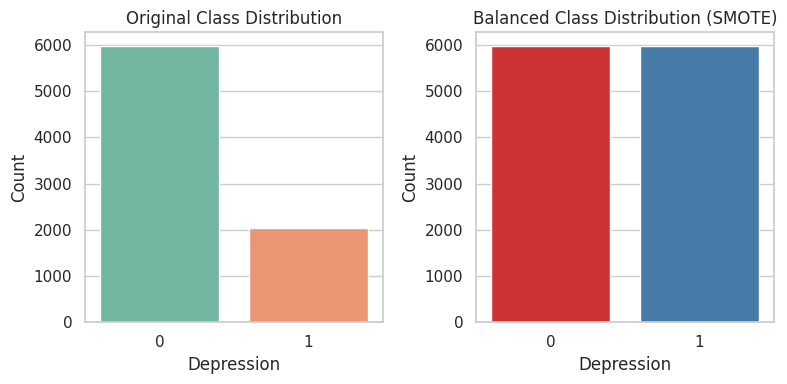

In [152]:
# Balance the target using SMOTE
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_train, y_train)

# Plot original and balanced class distribution
fig, ax = plt.subplots(1, 2, figsize=(8,4))

sns.countplot(x=y_train, ax=ax[0], palette='Set2')
ax[0].set_title('Original Class Distribution')
ax[0].set_xlabel('Depression')
ax[0].set_ylabel('Count')

sns.countplot(x=y_resampled, ax=ax[1], palette='Set1')
ax[1].set_title('Balanced Class Distribution (SMOTE)')
ax[1].set_xlabel('Depression')
ax[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

In [153]:
# -------------------- Utility Functions -------------------- #
def evaluate_model(model, X_test, y_test, title="Model"):
    y_pred = model.predict(X_test)

    # Classification report
    print(f"Classification Report - {title}:\n")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title(f"Confusion Matrix - {title}")
    plt.show()

    # Kappa Score
    kappa = cohen_kappa_score(y_test, y_pred)
    print(f"Cohen’s Kappa Score - {title}: {kappa:.4f}")

    return kappa

In [154]:
# -------------------- Model Training Functions -------------------- #

def train_logistic(X, y):
    pipe = Pipeline([
        ('clf', LogisticRegression(solver='liblinear'))
    ])
    params = {
        'clf__C': [0.01, 0.1, 1, 10],
        'clf__penalty': ['l1', 'l2']
    }
    grid = GridSearchCV(pipe, params, cv=5, scoring='f1')
    grid.fit(X, y)
    print("Best Parameters (Logistic):", grid.best_params_)
    return grid.best_estimator_

def train_xgboost(X, y):
    model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
    params = {
        'n_estimators': [100, 200],
        'max_depth': [3, 5],
        'learning_rate': [0.01, 0.1],
        'subsample': [0.8, 1]
    }
    grid = GridSearchCV(model, params, cv=5, scoring='f1')
    grid.fit(X, y)
    print("Best Parameters (XGBoost):", grid.best_params_)
    return grid.best_estimator_

def train_naive_bayes(X, y):
    # No real hyperparameters for GaussianNB
    model = GaussianNB()
    model.fit(X, y)
    return model

def train_gradient_boost(X, y):
    model = GradientBoostingClassifier()
    params = {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1]
    }
    grid = GridSearchCV(model, params, cv=5, scoring='f1')
    grid.fit(X, y)
    print("Best Parameters (GradientBoost):", grid.best_params_)
    return grid.best_estimator_



--- Training Logistic Regression ---
Best Parameters (Logistic): {'clf__C': 0.1, 'clf__penalty': 'l1'}
Classification Report - Logistic Regression:

              precision    recall  f1-score   support

           0       0.75      0.51      0.61      1492
           1       0.26      0.51      0.35       508

    accuracy                           0.51      2000
   macro avg       0.51      0.51      0.48      2000
weighted avg       0.63      0.51      0.54      2000



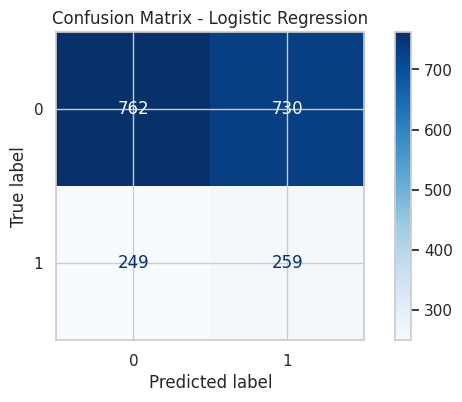

Cohen’s Kappa Score - Logistic Regression: 0.0157

--- Training XGBoost ---
Best Parameters (XGBoost): {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
Classification Report - XGBoost:

              precision    recall  f1-score   support

           0       0.75      1.00      0.85      1492
           1       0.50      0.00      0.00       508

    accuracy                           0.75      2000
   macro avg       0.62      0.50      0.43      2000
weighted avg       0.68      0.75      0.64      2000



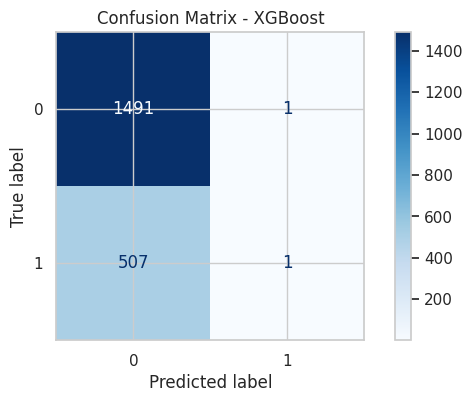

Cohen’s Kappa Score - XGBoost: 0.0019

--- Training Naive Bayes ---
Classification Report - Naive Bayes:

              precision    recall  f1-score   support

           0       0.74      0.55      0.63      1492
           1       0.24      0.43      0.31       508

    accuracy                           0.52      2000
   macro avg       0.49      0.49      0.47      2000
weighted avg       0.61      0.52      0.55      2000



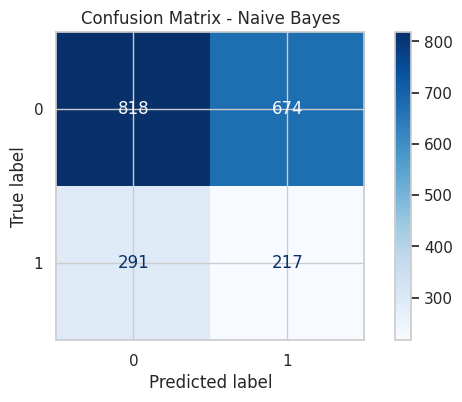

Cohen’s Kappa Score - Naive Bayes: -0.0197

--- Training Gradient Boosting ---
Best Parameters (GradientBoost): {'learning_rate': 0.1, 'n_estimators': 200}
Classification Report - Gradient Boosting:

              precision    recall  f1-score   support

           0       0.75      1.00      0.85      1492
           1       0.50      0.00      0.00       508

    accuracy                           0.75      2000
   macro avg       0.62      0.50      0.43      2000
weighted avg       0.68      0.75      0.64      2000



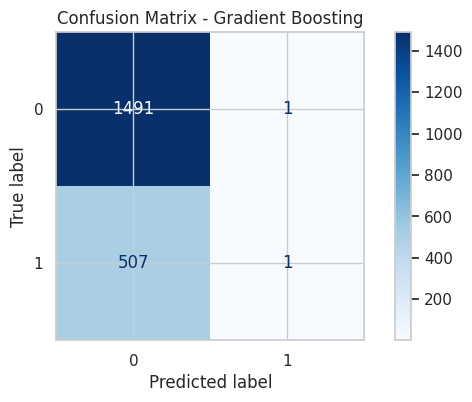

Cohen’s Kappa Score - Gradient Boosting: 0.0019


np.float64(0.0019332631281141488)

In [155]:
# -------------------- Train and Evaluate All Models -------------------- #
models = {}
print("\n--- Training Logistic Regression ---")
models['Logistic'] = train_logistic(X_resampled, y_resampled)
evaluate_model(models['Logistic'], X_test, y_test, "Logistic Regression")

print("\n--- Training XGBoost ---")
models['XGBoost'] = train_xgboost(X_resampled, y_resampled)
evaluate_model(models['XGBoost'], X_test, y_test, "XGBoost")

print("\n--- Training Naive Bayes ---")
models['NaiveBayes'] = train_naive_bayes(X_resampled, y_resampled)
evaluate_model(models['NaiveBayes'], X_test, y_test, "Naive Bayes")

print("\n--- Training Gradient Boosting ---")
models['GradientBoost'] = train_gradient_boost(X_resampled, y_resampled)
evaluate_model(models['GradientBoost'], X_test, y_test, "Gradient Boosting")

In [156]:
# -------------------- Save Models -------------------- #
for name, model in models.items():
    joblib.dump(model, f'{name.lower()}_model.pkl')
    print(f">>> Saved {name} model as {name.lower()}_model.pkl")

>>> Saved Logistic model as logistic_model.pkl
>>> Saved XGBoost model as xgboost_model.pkl
>>> Saved NaiveBayes model as naivebayes_model.pkl
>>> Saved GradientBoost model as gradientboost_model.pkl
